#data download and preprocessing
##The same was done in phase 1


In [1]:
import os
import pandas as pd

os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as f:
    f.write('{"username":"<alisarmadi98>","key":"cea34ad20deb5a5813c6e7c462d7d7ab"}')

os.system('kaggle datasets download -d ifteshanajnin/carinsuranceclaimprediction-classification')

import zipfile
with zipfile.ZipFile('carinsuranceclaimprediction-classification.zip', 'r') as zip_ref:
    zip_ref.extractall()

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df_new = df_train.drop(columns=['policy_id', 'area_cluster', 'make', 'segment', 'model', 'fuel_type', 'engine_type'])

def extract_numeric(value):
    return float(value.split('Nm')[0].split('bhp')[0])

df_new['max_torque'] = df_new['max_torque'].apply(extract_numeric)
df_new['max_power'] = df_new['max_power'].apply(extract_numeric)

yes_no_columns = [
    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
    'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper',
    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
    'is_power_door_locks', 'is_central_locking', 'is_power_steering',
    'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
    'is_ecw', 'is_speed_alert'
]

for col in yes_no_columns:
    df_new[col] = df_new[col].map({'No': 0, 'Yes': 1})

df_new['rear_brakes_type'] = df_new['rear_brakes_type'].map({'Drum': 0, 'Disc': 1})

df_new['transmission_type'] = df_new['transmission_type'].map({'Manual': 0, 'Automatic': 1})

df_new['steering_type'] = df_new['steering_type'].map({'Power': 0, 'Automatic': 1}).fillna(-1)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df_new_train = df_train.drop(columns=['policy_id', 'area_cluster', 'make', 'segment', 'model', 'fuel_type', 'engine_type'])

def extract_numeric(value):
    return float(value.split('Nm')[0].split('bhp')[0])

df_new_train['max_torque'] = df_new_train['max_torque'].apply(extract_numeric)
df_new_train['max_power'] = df_new_train['max_power'].apply(extract_numeric)

yes_no_columns = [
    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
    'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper',
    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
    'is_power_door_locks', 'is_central_locking', 'is_power_steering',
    'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
    'is_ecw', 'is_speed_alert'
]

for col in yes_no_columns:
    df_new_train[col] = df_new_train[col].map({'No': 0, 'Yes': 1})

df_new_train['rear_brakes_type'] = df_new_train['rear_brakes_type'].map({'Drum': 0, 'Disc': 1})

df_new_train['transmission_type'] = df_new_train['transmission_type'].map({'Manual': 0, 'Automatic': 1})

df_new_train['steering_type'] = df_new_train['steering_type'].map({'Power': 0, 'Automatic': 1}).fillna(-1)

df_new_test = df_test.drop(columns=['policy_id', 'area_cluster', 'make', 'segment', 'model', 'fuel_type', 'engine_type'])

def extract_numeric(value):
    return float(value.split('Nm')[0].split('bhp')[0])

df_new_test['max_torque'] = df_new_test['max_torque'].apply(extract_numeric)
df_new_test['max_power'] = df_new_test['max_power'].apply(extract_numeric)

yes_no_columns = [
    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
    'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper',
    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
    'is_power_door_locks', 'is_central_locking', 'is_power_steering',
    'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
    'is_ecw', 'is_speed_alert'
]

for col in yes_no_columns:
    df_new_test[col] = df_new_test[col].map({'No': 0, 'Yes': 1})

df_new_test['rear_brakes_type'] = df_new_test['rear_brakes_type'].map({'Drum': 0, 'Disc': 1})

df_new_test['transmission_type'] = df_new_test['transmission_type'].map({'Manual': 0, 'Automatic': 1})

df_new_test['steering_type'] = df_new_test['steering_type'].map({'Power': 0, 'Automatic': 1}).fillna(-1)

#Question 1)

### Comparison: Confidence Intervals and Chi-Square Test

**Calculating 95% Confidence Intervals for Differences in Proportions:**

The analysis begins by calculating the proportion of claims (is_claim equals 1) within each ncap_rating group. It then computes the standard error and derives 95% confidence intervals for the differences in proportions between each pair of ncap_rating groups.

**Interpreting the 95% Confidence Intervals:**

- **NCAP rating 0 vs. 2:** CI = [-0.0073, 0.0022]
  - This interval includes 0, indicating no statistically significant difference in claim proportions between ncap_rating 0 and 2 at the 95% confidence level.

- **NCAP rating 0 vs. 3:** CI = [-0.0071, 0.0033]
  - Similarly, this interval includes 0, suggesting no significant difference between ncap_rating 0 and 3.

- **NCAP rating 0 vs. 5:** CI = [-0.0113, 0.0104]
  - The interval includes 0, indicating no significant difference between ncap_rating 0 and 5.

- **NCAP rating 0 vs. 4:** CI = [-0.0159, 0.0071]
  - This interval also includes 0, suggesting no significant difference between ncap_rating 0 and 4.

Since all intervals contain 0, we cannot conclude significant differences in claim proportions between any pairs of ncap_rating groups at the 95% confidence level.

**Chi-Square Test of Independence:**

The code constructs a contingency table of ncap_rating vs. is_claim and performs a chi-square test of independence. Key results include:

- **Chi-square test statistic:** 1.467
- **P-value:** 0.833

The high p-value (0.833) exceeds the standard significance level (0.05), indicating insufficient evidence to reject the null hypothesis. Thus, there is no significant indication that ncap_rating and is_claim are dependent. This implies that the occurrence of a claim is independent of the NCAP rating of the vehicle.


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

ncap_rating_groups = df_new['ncap_rating'].unique()

proportions = df_new.groupby('ncap_rating')['is_claim'].mean().values

n_groups = df_new['ncap_rating'].value_counts().values
se = np.sqrt(proportions * (1 - proportions) / n_groups)

ci_diff = []
for i in range(len(ncap_rating_groups) - 1):
    for j in range(i + 1, len(ncap_rating_groups)):
        diff = proportions[i] - proportions[j]
        se_diff = np.sqrt(se[i]**2 + se[j]**2)
        ci = [diff - 1.96 * se_diff, diff + 1.96 * se_diff]
        ci_diff.append((ncap_rating_groups[i], ncap_rating_groups[j], ci))

for item in ci_diff:
    print(f"95% CI for difference between NCAP rating {item[0]} and {item[1]}: {item[2]}")

contingency_table = pd.crosstab(df_new['ncap_rating'], df_new['is_claim'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("The variables 'ncap_rating' and 'is_claim' are not independent (reject null hypothesis).")
else:
    print("The variables 'ncap_rating' and 'is_claim' are independent (fail to reject null hypothesis).")


95% CI for difference between NCAP rating 0 and 2: [-0.007343254968300526, 0.0021917650978558008]
95% CI for difference between NCAP rating 0 and 3: [-0.0070511951389723975, 0.003338548453433036]
95% CI for difference between NCAP rating 0 and 5: [-0.011341925870572263, 0.01035047303324508]
95% CI for difference between NCAP rating 0 and 4: [-0.015900927292690797, 0.0071319856082758815]
95% CI for difference between NCAP rating 2 and 3: [-0.004638443201033582, 0.006077286385938946]
95% CI for difference between NCAP rating 2 and 5: [-0.008845184672255663, 0.013005221705373205]
95% CI for difference between NCAP rating 2 and 4: [-0.013399618510325723, 0.009782166696355532]
95% CI for difference between NCAP rating 3 and 5: [-0.009757748536454246, 0.012478942384666424]
95% CI for difference between NCAP rating 3 and 4: [-0.014301266559638348, 0.009244971560762793]
95% CI for difference between NCAP rating 5 and 4: [-0.01903006807695209, 0.011252579229864359]
Chi-square test statistic: 1.

#Question 2)
### Analysis of Sampling and Hypothesis Testing

**Sampling:**
A random sample of size 15 is selected from the dataset.

**Population Proportion Calculation:**
The overall proportion of claims (is_claim equals 1) in the entire dataset is computed.

**Simulation (Bootstrap Method):**
A bootstrap method generates 10,000 simulated samples from a binomial distribution using the population proportion. For each simulated sample, the proportion of claims is calculated.

**P-value Calculation:**
The p-value is computed by comparing the observed sample proportion to the distribution of simulated proportions. It represents the probability of obtaining a proportion at least as extreme as the sample proportion under the null hypothesis.

**Hypothesis Test:**
Based on the p-value, the null hypothesis (that the sample proportion is equal to the population proportion) is tested. If the p-value is greater than 0.05, the null hypothesis is not rejected.

### Results Interpretation

- **Sample Proportion:** The proportion of claims in the selected sample of 15 observations is 0.1333 (or 13.33%).

- **Population Proportion (p0):** The overall proportion of claims in the entire dataset is approximately 0.0640 (or 6.40%).

- **Simulated p-value:** The p-value obtained from the simulation is 0.2457.

Since the p-value (0.2457) exceeds the common significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is insufficient evidence to conclude that the sample proportion of claims (13.33%) differs significantly from the population proportion of claims (6.40%). Thus, the observed sample proportion is not significantly different from the population proportion.


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
sample_size = 15
sample = df_new.sample(n=sample_size)

p0 = df_new['is_claim'].mean()
sample_proportion = sample['is_claim'].mean()

n_simulations = 10000
simulated_proportions = []

for _ in range(n_simulations):
    simulated_sample = np.random.choice([0, 1], size=sample_size, p=[1 - p0, p0])
    simulated_proportions.append(simulated_sample.mean())

simulated_proportions = np.array(simulated_proportions)

p_value = np.mean(simulated_proportions >= sample_proportion)

print(f"Sampled data (n={sample_size}):")
print(sample)
print(f"\nSample proportion of claims: {sample_proportion}")
print(f"Population proportion of claims (p0): {p0}")
print(f"Simulated p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The sample proportion is significantly different from the population proportion.")
else:
    print("Fail to reject the null hypothesis: The sample proportion is not significantly different from the population proportion.")


Sampled data (n=15):
       policy_tenure  age_of_car  age_of_policyholder  population_density  \
29918       0.285690        0.05             0.509615                4076   
5034        0.122252        0.05             0.403846                8794   
38100       0.213020        0.03             0.365385                4076   
17050       0.036614        0.00             0.432692               17804   
35146       1.041438        0.04             0.576923                8794   
11077       0.080008        0.17             0.548077               73430   
5977        0.080248        0.06             0.442308                6112   
43464       1.065218        0.14             0.423077                5410   
54642       0.219739        0.01             0.384615               27003   
21981       0.474684        0.10             0.557692                6108   
28537       0.142715        0.03             0.423077               17804   
45443       0.593838        0.01             0.317308  

#Question 3)

##Part a)

### Requirements for Chi-Square Goodness of Fit Test

1. The data should be a random sample.
2. The expected frequency for each category should be at least 5.

### Probability Distribution Calculation

The probability distribution of ncap_rating is computed for the entire dataset.

### Random Sample

- A random sample of size 100 is drawn from the dataframe.

### Biased Sample

- A biased sample is created by oversampling category 2 of ncap_rating (50 instances) and combining it with a random sample of other categories (50 instances).

### Chi-Square Goodness of Fit Test

- The observed frequencies for each sample are compared to the expected frequencies from the population distribution using the chi-square goodness of fit test.
- Requirements for the chi-square test are mentioned in the comments:
  - The data should be a random sample.
  - The expected frequency for each category should be at least 5.

#### Random Sample Results

- **Chi-square Statistic:** 3.51
- **P-value:** 0.48

Since the p-value (0.48) exceeds 0.05, we fail to reject the null hypothesis. This indicates that the distribution of ncap_rating in the random sample is not significantly different from the population distribution. Therefore, the random sample is considered representative of the population in terms of ncap_rating.

#### Biased Sample Results

- **Chi-square Statistic:** 11.39
- **P-value:** 0.02

Since the p-value (0.02) is less than 0.05, we reject the null hypothesis. This suggests that the distribution of ncap_rating in the biased sample is significantly different from the population distribution. Thus, the biased sample does not accurately represent the population in terms of ncap_rating.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, chisquare

ncap_distribution = df_new['ncap_rating'].value_counts(normalize=True).sort_index()
print("Actual NCAP Rating Distribution:")
print(ncap_distribution)

np.random.seed(42)
random_sample = df_new.sample(n=100)['ncap_rating']
random_sample_distribution = random_sample.value_counts(normalize=True).sort_index()

biased_sample_2 = df_new[df_new['ncap_rating'] == 2].sample(n=50)
biased_sample_rest = df_new[df_new['ncap_rating'] != 2].sample(n=50)
biased_sample = pd.concat([biased_sample_2, biased_sample_rest])
biased_sample_distribution = biased_sample['ncap_rating'].value_counts(normalize=True).sort_index()

print("\nRandom Sample NCAP Rating Distribution:")
print(random_sample_distribution)
print("\nBiased Sample NCAP Rating Distribution:")
print(biased_sample_distribution)

observed_random = random_sample.value_counts().sort_index().reindex(ncap_distribution.index, fill_value=0)
expected_random = ncap_distribution * 100
chi2_random, p_random = chisquare(f_obs=observed_random, f_exp=expected_random)

observed_biased = biased_sample['ncap_rating'].value_counts().sort_index().reindex(ncap_distribution.index, fill_value=0)
expected_biased = ncap_distribution * 100
chi2_biased, p_biased = chisquare(f_obs=observed_biased, f_exp=expected_biased)

print("\nChi-square Test for Random Sample:")
print(f"Chi-square Statistic: {chi2_random}")
print(f"P-value: {p_random}")

print("\nChi-square Test for Biased Sample:")
print(f"Chi-square Statistic: {chi2_biased}")
print(f"P-value: {p_biased}")

if p_random < 0.05:
    print("\nReject the null hypothesis for the random sample: The sample distribution is significantly different from the population distribution.")
else:
    print("\nFail to reject the null hypothesis for the random sample: The sample distribution is not significantly different from the population distribution.")

if p_biased < 0.05:
    print("Reject the null hypothesis for the biased sample: The sample distribution is significantly different from the population distribution.")
else:
    print("Fail to reject the null hypothesis for the biased sample: The sample distribution is not significantly different from the population distribution.")


Actual NCAP Rating Distribution:
ncap_rating
0    0.325932
2    0.365272
3    0.239248
4    0.036080
5    0.033469
Name: proportion, dtype: float64

Random Sample NCAP Rating Distribution:
ncap_rating
0    0.39
2    0.32
3    0.24
4    0.04
5    0.01
Name: proportion, dtype: float64

Biased Sample NCAP Rating Distribution:
ncap_rating
0    0.27
2    0.50
3    0.15
4    0.06
5    0.02
Name: proportion, dtype: float64

Chi-square Test for Random Sample:
Chi-square Statistic: 3.5089639661171983
P-value: 0.47651666341381693

Chi-square Test for Biased Sample:
Chi-square Statistic: 11.386288673812029
P-value: 0.022549090021368193

Fail to reject the null hypothesis for the random sample: The sample distribution is not significantly different from the population distribution.
Reject the null hypothesis for the biased sample: The sample distribution is significantly different from the population distribution.


##part b)

### Contingency Table Creation

A contingency table is constructed to display the counts of is_claim (0 or 1) for each ncap_rating category.

### Chi-Square Test of Independence

- Using the chi2_contingency function, we compute the chi-square statistic, p-value, degrees of freedom, and expected frequencies.

### Results Interpretation

**Null Hypothesis:** The null hypothesis posits that ncap_rating and is_claim are independent.

- **P-value:** The computed p-value (0.833) exceeds the conventional significance level of 0.05.

Since the p-value is greater than 0.05, we do not reject the null hypothesis. This indicates insufficient evidence to conclude that there is a significant relationship between the NCAP rating of a vehicle and whether a claim is made. Therefore, the probability of making a claim does not appear to depend significantly on the NCAP rating of the vehicle.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_new['ncap_rating'], df_new['is_claim'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(ex)

if p < 0.05:
    print("\nReject the null hypothesis: The variables 'ncap_rating' and 'is_claim' are not independent.")
else:
    print("\nFail to reject the null hypothesis: The variables 'ncap_rating' and 'is_claim' are independent.")


Contingency Table:
is_claim         0     1
ncap_rating             
0            17905  1192
2            20011  1391
3            13117   901
4             1981   133
5             1830   131

Chi-square Statistic: 1.4666815737178478
P-value: 0.8325265632423358
Degrees of Freedom: 4
Expected Frequencies:
[[17875.40735937  1221.59264063]
 [20032.96163299  1369.03836701]
 [13121.29969962   896.70030038]
 [ 1978.77211906   135.22788094]
 [ 1835.55918897   125.44081103]]

Fail to reject the null hypothesis: The variables 'ncap_rating' and 'is_claim' are independent.


#Question 4)

##part a)

### Selecting Predictors for Forecasting Policy Tenure

To begin forecasting policy_tenure, a crucial numerical response variable from the dataframe must be chosen. In this context, policy_tenure, representing the duration a policy has been active, provides valuable insights for insurers aiming to understand policyholder behavior and retention.

### Explanatory Variables

Two explanatory variables are selected to forecast policy_tenure:

- **Age of Policyholder (age_of_policyholder):** This variable is expected to influence policy_tenure due to its association with varying insurance needs and retention patterns across different age groups. Younger policyholders may exhibit more dynamic policy behaviors, while older policyholders tend to prioritize stability and longer-term relationships with insurers.

- **NCAP Rating (ncap_rating):** This variable indicates the safety rating of the vehicle insured, potentially impacting policy tenure through perceived risk reduction and potential premium adjustments based on safety features.

### Predicting the More Influential Predictor

Prior to constructing a model, initial speculation suggests that age_of_policyholder may be the more influential predictor for policy_tenure. Here’s why:

- **Direct Influence on Behavior:** Age directly correlates with decision-making behaviors. Younger policyholders may change policies more frequently due to life changes or seeking better offers, while older policyholders may value stability.

- **Market Segmentation:** Insurers often segment markets by age, tailoring products to different age groups, underscoring age's importance in predicting policyholder behavior.

- **Historical Behavior:** Age has historically been a significant predictor in insurance behaviors. Older drivers, for example, tend to have longer histories with insurers and may exhibit longer policy tenures.

While ncap_rating remains crucial, its influence may be more indirect, primarily affecting perceptions of vehicle safety and premiums rather than directly influencing policyholder behaviors. Hence, age_of_policyholder is hypothesized to have a stronger predictive influence on policy_tenure.


##part b)

###part I)

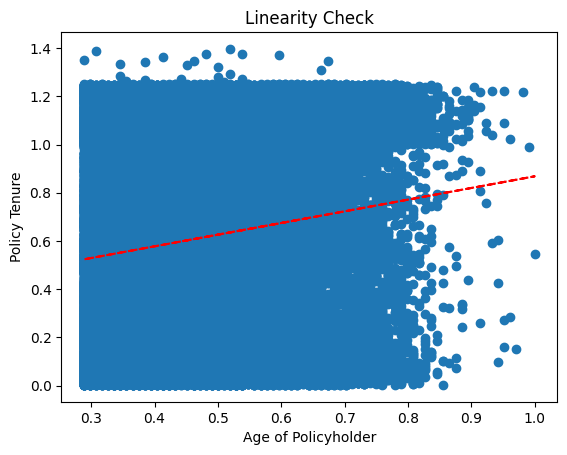

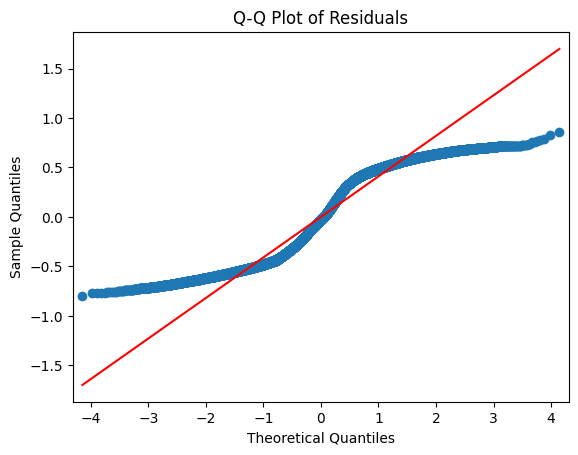

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test p-value: 0.0


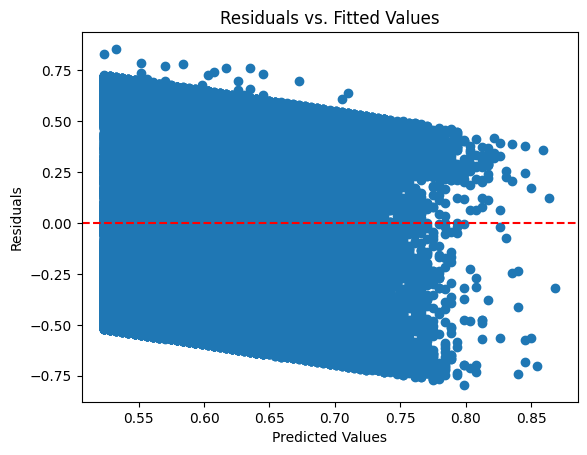

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

df = df_new

X_age = df['age_of_policyholder']
y = df['policy_tenure']

X_age = sm.add_constant(X_age)

model_age = sm.OLS(y, X_age).fit()
predictions_age = model_age.predict(X_age)

residuals_age = y - predictions_age

plt.scatter(df['age_of_policyholder'], y)
plt.plot(df['age_of_policyholder'], predictions_age, color='red', linestyle='--')
plt.xlabel('Age of Policyholder')
plt.ylabel('Policy Tenure')
plt.title('Linearity Check')
plt.show()

qqplot(residuals_age, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

shapiro_test_age = shapiro(residuals_age)
print(f"Shapiro-Wilk test p-value: {shapiro_test_age.pvalue}")

plt.scatter(predictions_age, residuals_age)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

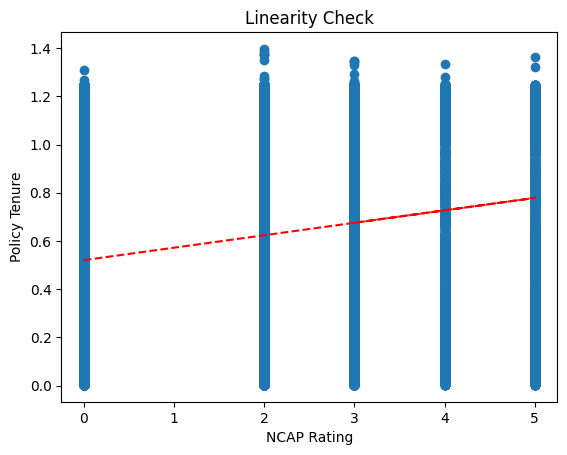

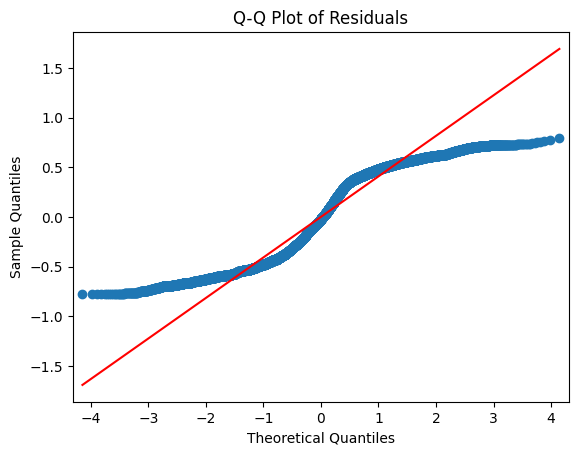

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test p-value: 0.0


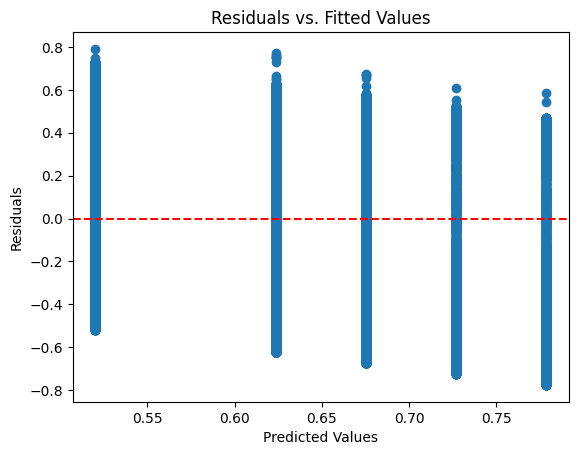

In [ ]:
X_ncap = df['ncap_rating']
y = df['policy_tenure']

X_ncap = sm.add_constant(X_ncap)

model_ncap = sm.OLS(y, X_ncap).fit()
predictions_ncap = model_ncap.predict(X_ncap)

residuals_ncap = y - predictions_ncap

plt.scatter(df['ncap_rating'], y)
plt.plot(df['ncap_rating'], predictions_ncap, color='red', linestyle='--')
plt.xlabel('NCAP Rating')
plt.ylabel('Policy Tenure')
plt.title('Linearity Check')
plt.show()

qqplot(residuals_ncap, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

shapiro_test_ncap = shapiro(residuals_ncap)
print(f"Shapiro-Wilk test p-value: {shapiro_test_ncap.pvalue}")

plt.scatter(predictions_ncap, residuals_ncap)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


###part II)

### Predictors Analysis for Policy Tenure

#### Age of Policyholder

**Coefficients:**
- **Intercept (const):** 0.3839  
  *Interpretation:* When age_of_policyholder is zero, the expected policy_tenure is 0.3839 years.
- **Slope (age_of_policyholder):** 0.4842  
  *Interpretation:* For each additional year in the age of the policyholder, policy_tenure is expected to increase by 0.4842 years, holding all else constant.

**Significance:**
- **t-statistic for age_of_policyholder:** 35.142  
- **P-value:** 0.000 (highly significant)  
  *Interpretation:* There is a strong relationship between age_of_policyholder and policy_tenure.

#### NCAP Rating

**Model Summary:**
- **R-squared:** 0.030
- **Adjusted R-squared:** 0.030
- **F-statistic:** 1814
- **Prob (F-statistic):** 0.00 (highly significant)
- **Number of Observations:** 58,592
- **AIC:** 61,190
- **BIC:** 61,210

**Coefficients:**
- **Intercept (const):** 0.5204  
  *Interpretation:* When ncap_rating is zero, the expected policy_tenure is 0.5204 years.
- **Slope (ncap_rating):** 0.0516  
  *Interpretation:* For each additional point in the NCAP rating, policy_tenure is expected to increase by 0.0516 years, holding all else constant.

**Significance:**
- **t-statistic for ncap_rating:** 42.587
- **P-value:** 0.000 (highly significant)  
  *Interpretation:* There is a strong relationship between ncap_rating and policy_tenure.

#### Comparison of Predictors

**R-squared Values:**
- **age_of_policyholder:** 0.021
- **ncap_rating:** 0.030  
  *Interpretation:* ncap_rating explains 3.0% of the variance in policy_tenure, while age_of_policyholder explains 2.1%. Although both are low, indicating weak explanatory power, ncap_rating has a slightly better fit.

**Significance of Slopes:**
- Both predictors are highly significant (P-value = 0.000).  
  *Interpretation:* The relationship between policy_tenure and both predictors is statistically significant.

**Intercepts:**
- **age_of_policyholder:** 0.3839
- **ncap_rating:** 0.5204  
  *Interpretation:* The intercepts indicate the baseline policy_tenure when the predictors are zero.

**Slopes:**
- **age_of_policyholder:** Each additional year increases policy_tenure by 0.4842 years.
- **ncap_rating:** Each additional NCAP rating point increases policy_tenure by 0.0516 years.


In [ ]:
print(model_age.summary())
print(model_ncap.summary())

                            OLS Regression Results                            
Dep. Variable:          policy_tenure   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1235.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          9.60e-268
Time:                        18:39:14   Log-Likelihood:                -30877.
No. Observations:               58592   AIC:                         6.176e+04
Df Residuals:                   58590   BIC:                         6.178e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3839    

###part III)

### Comparison of Predictors for Policy Tenure

#### Intercept Comparison
- **age_of_policyholder:** 0.3839
- **ncap_rating:** 0.5204

*Interpretation:* The intercept for age_of_policyholder (0.3839) is lower than that for ncap_rating (0.5204). This suggests that when both predictors are at their minimum (or zero), the baseline policy tenure tends to be slightly higher when considering the NCAP rating compared to the age of the policyholder.

#### Slope Comparison
- **age_of_policyholder:** 0.4842
- **ncap_rating:** 0.0516

*Interpretation:* The slope for age_of_policyholder (0.4842) is significantly larger than that for ncap_rating (0.0516). This implies that the age of the policyholder has a much stronger effect on policy tenure compared to the NCAP rating. Specifically, an additional year in the age of the policyholder increases policy tenure by approximately 0.4842 years, while an additional point in the NCAP rating increases policy tenure by only about 0.0516 years.

#### Significance and Practical Implications
- Both variables have highly significant p-values, indicating they are statistically significant predictors of policy tenure.
- Despite their statistical significance, the effect size (as indicated by the slope) for age_of_policyholder is much larger than that for ncap_rating. This suggests that in practical terms, the age of the policyholder is a more substantial predictor of policy tenure compared to the NCAP rating.


In [ ]:
intercept_age = model_age.params[0]
slope_age = model_age.params[1]

print(f"Predictive equation: policy_tenure = {intercept_age} + {slope_age} * age_of_policyholder")

print(f"Interpretation: For each additional year in the age of the policyholder, the policy tenure is expected to change by {slope_age} years, holding all else constant.")

Predictive equation: policy_tenure = 0.38394223815751394 + 0.4842228698894488 * age_of_policyholder
Interpretation: For each additional year in the age of the policyholder, the policy tenure is expected to change by 0.4842228698894488 years, holding all else constant.


In [ ]:
intercept_ncap = model_ncap.params[0]
slope_ncap = model_ncap.params[1]

print(f"Predictive equation: policy_tenure = {intercept_ncap} + {slope_ncap} * ncap_rating")

print(f"Interpretation: For each additional point in NCAP rating, the policy tenure is expected to change by {slope_ncap} years, holding all else constant.")


Predictive equation: policy_tenure = 0.5203531983009424 + 0.05164519194738332 * ncap_rating
Interpretation: For each additional point in NCAP rating, the policy tenure is expected to change by 0.05164519194738332 years, holding all else constant.


###part IV)

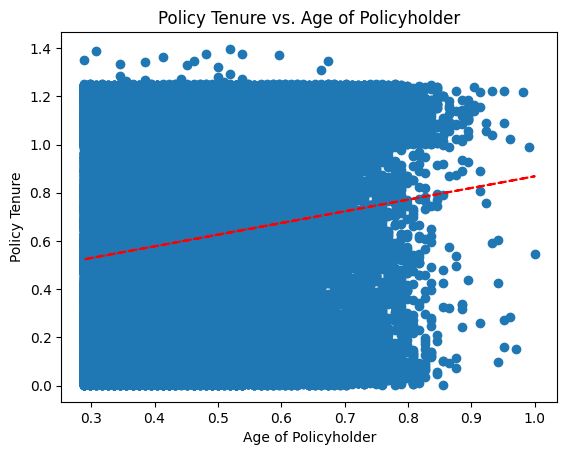

In [ ]:
plt.scatter(df['age_of_policyholder'], y)
plt.plot(df['age_of_policyholder'], predictions_age, color='red', linestyle='--')
plt.xlabel('Age of Policyholder')
plt.ylabel('Policy Tenure')
plt.title('Policy Tenure vs. Age of Policyholder')
plt.show()

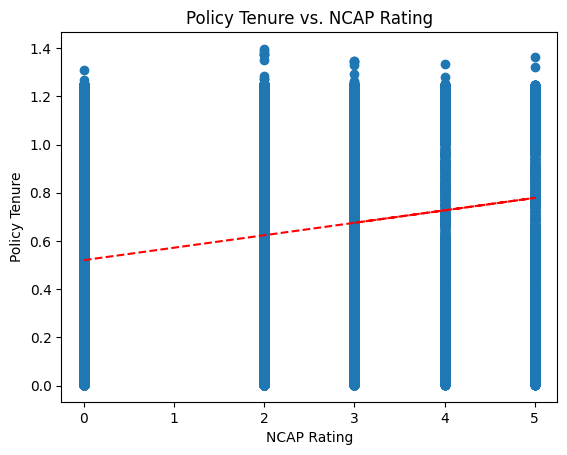

In [ ]:
plt.scatter(df['ncap_rating'], y)
plt.plot(df['ncap_rating'], predictions_ncap, color='red', linestyle='--')
plt.xlabel('NCAP Rating')
plt.ylabel('Policy Tenure')
plt.title('Policy Tenure vs. NCAP Rating')
plt.show()

##pard c)

### Comparison of Predictors for Policy Tenure

#### R-squared Value
- **age_of_policyholder:** 0.021
- **ncap_rating:** 0.030

*Interpretation:* Both R-squared values are low, indicating that age_of_policyholder and ncap_rating individually explain a small portion of the variance in policy_tenure. However, ncap_rating has a slightly higher R-squared value, suggesting it explains more variability in policy_tenure compared to age_of_policyholder.

#### Slope Coefficient
- **age_of_policyholder:** 0.4842
- **ncap_rating:** 0.0516

*Interpretation:* The slope for age_of_policyholder (0.4842) is much larger than that for ncap_rating (0.0516). This indicates that changes in the age of the policyholder have a more substantial impact on policy_tenure compared to changes in the NCAP rating.

#### F-statistic and P-value
- **age_of_policyholder:** F-statistic = 1235, p-value ≈ 9.60e−268
- **ncap_rating:** F-statistic = 1814, p-value ≈ 0

*Interpretation:* Both age_of_policyholder and ncap_rating are highly significant predictors of policy_tenure (very low p-values). However, ncap_rating has a higher F-statistic, indicating a stronger relationship with policy_tenure compared to age_of_policyholder.


## part d)

### Model Comparison for Predicting Policy Tenure

#### Explanation

- **ssr:** Sum of squared residuals. Lower values indicate a better fit of the model to the data.
- **ss_diff:** Difference in sum of squared residuals between the models.
- **F:** F-statistic for the comparison. It indicates whether the additional explanatory variable(s) improve the model significantly.
- **Pr(>F):** p-value for the F-statistic. A low p-value indicates that the additional variable(s) significantly improve the model.
- The sum of squared residuals (ssr) decreases from Model 1 to Model 3, indicating an improvement in the model fit.
- The F-statistic for the comparison between Model 2 and Model 3 is 1376.76 with a p-value ≈ 0, suggesting that adding ncap_rating to the model with age_of_policyholder significantly improves the fit.
- Adjusted R² Comparison: Model 3, which includes both age_of_policyholder and ncap_rating, explains more variability in policy_tenure than either of the single-predictor models.
- ANOVA Comparison: The significant p-value from the ANOVA table indicates that adding ncap_rating to the model significantly improves the fit.

Thus, ncap_rating is a significant predictor alongside age_of_policyholder for predicting policy_tenure, and the model combining both predictors is the most effective.


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

model1 = smf.ols('policy_tenure ~ age_of_policyholder', data=df_new).fit()

model2 = smf.ols('policy_tenure ~ ncap_rating', data=df_new).fit()

model3 = smf.ols('policy_tenure ~ age_of_policyholder + ncap_rating', data=df_new).fit()

adjusted_r2_model1 = model1.rsquared_adj
adjusted_r2_model2 = model2.rsquared_adj
adjusted_r2_model3 = model3.rsquared_adj

print(f"Adjusted R² for Model 1 (policy_tenure ~ age_of_policyholder): {adjusted_r2_model1}")
print(f"Adjusted R² for Model 2 (policy_tenure ~ ncap_rating): {adjusted_r2_model2}")
print(f"Adjusted R² for Model 3 (policy_tenure ~ age_of_policyholder + ncap_rating): {adjusted_r2_model3}")

anova_results = anova_lm(model1, model2, model3)

print("\nANOVA table to compare the models:")
print(anova_results)

Adjusted R² for Model 1 (policy_tenure ~ age_of_policyholder): 0.020625944524125805
Adjusted R² for Model 2 (policy_tenure ~ ncap_rating): 0.030009326508252387
Adjusted R² for Model 3 (policy_tenure ~ age_of_policyholder + ncap_rating): 0.05226331348276869

ANOVA table to compare the models:
   df_resid          ssr  df_diff     ss_diff            F         Pr(>F)
0   58590.0  9842.400426      0.0         NaN          NaN            NaN
1   58590.0  9748.100396     -0.0   94.300030         -inf            NaN
2   58589.0  9524.292283      1.0  223.808113  1376.763031  6.846230e-298


## part e)

### Criteria for Evaluating Predictors in Regression Analysis

#### Key Considerations

- **High Adjusted R² Value:** A predictor with a higher Adjusted R² value indicates that it explains a larger portion of the variability in the response variable after considering the number of predictors in the model.

- **Statistical Significance:** A predictor should have a low p-value (typically < 0.05) to be considered statistically significant, indicating that the observed relationship is unlikely to be due to random chance.

- **Substantial Coefficient Value:** A meaningful and non-trivial coefficient suggests a stronger influence of the predictor on the response variable.

- **Consistent Improvement in Model Fit:** A good predictor improves the model fit, demonstrated by significant reductions in sum of squared residuals (ssr) and a high F-statistic in an ANOVA table.

- **Linearity:** The predictor should exhibit a linear relationship with the response variable to meet the assumptions of linear regression and accurately capture their association.

- **Normal Distribution of Residuals:** Residuals should approximate a normal distribution when the predictor is included, indicating unbiased predictions and a well-specified model.

- **Constant Variability (Homoscedasticity):** The predictor should not introduce heteroscedasticity, ensuring consistent variability of residuals across all predictor levels and reliable predictions.

- **Practical Relevance:** Beyond statistical significance, the predictor should be practically relevant to the domain being studied, aligning with intuitive expectations and interpretations within the context.

#### Application to the Results

- **Age of Policyholder:** This predictor showed statistical significance with a low p-value and a meaningful coefficient. However, its Adjusted R² value was relatively low, indicating it explains a smaller portion of the variance.

- **NCAP Rating:** This predictor also demonstrated statistical significance and enhanced the model fit when added alongside age_of_policyholder. It contributed to an increase in Adjusted R² and a significant F-statistic, highlighting its importance.

- **Combined Model:** Incorporating both age_of_policyholder and ncap_rating resulted in the highest Adjusted R² value and significantly improved model fit. This underscores their joint effectiveness in predicting policy tenure.

In conclusion, both age_of_policyholder and ncap_rating are valuable predictors, with ncap_rating providing additional explanatory power when combined with age_of_policyholder in the predictive model.

##part f)

### Random Sampling and Splitting:

  - A random sample of 100 data points is selected from the dataset.
  - This sample is divided into a training set (90%) and a testing set (10%).

### Building Linear Regression Models:

  - **Model 1:** policy_tenure ~ age_of_policyholder
    - Fitted using statsmodels with a summary that includes hypothesis tests for predictor significance.
  - **Model 2:** policy_tenure ~ ncap_rating
    - Also fitted using statsmodels with a summary that includes hypothesis tests for predictor significance.

### Confidence Intervals for the Slopes:

  - 95% confidence intervals for the slopes of age_of_policyholder and ncap_rating are computed and displayed.

### Prediction on Test Data:

  - Both models are used to predict policy_tenure for the test data.
  - Predictions are compared with actual values from the test data to evaluate model performance.

### Plotting:

  - Scatter plots depicting the relationships between policy_tenure and age_of_policyholder, as well as policy_tenure and ncap_rating, are created.
  - Each plot includes a least-squares regression line to visualize the fitted model.


Model 1 Summary (policy_tenure ~ age_of_policyholder):
                            OLS Regression Results                            
Dep. Variable:          policy_tenure   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     7.632
Date:                Sun, 14 Jul 2024   Prob (F-statistic):            0.00698
Time:                        00:13:56   Log-Likelihood:                -42.991
No. Observations:                  90   AIC:                             89.98
Df Residuals:                      88   BIC:                             94.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

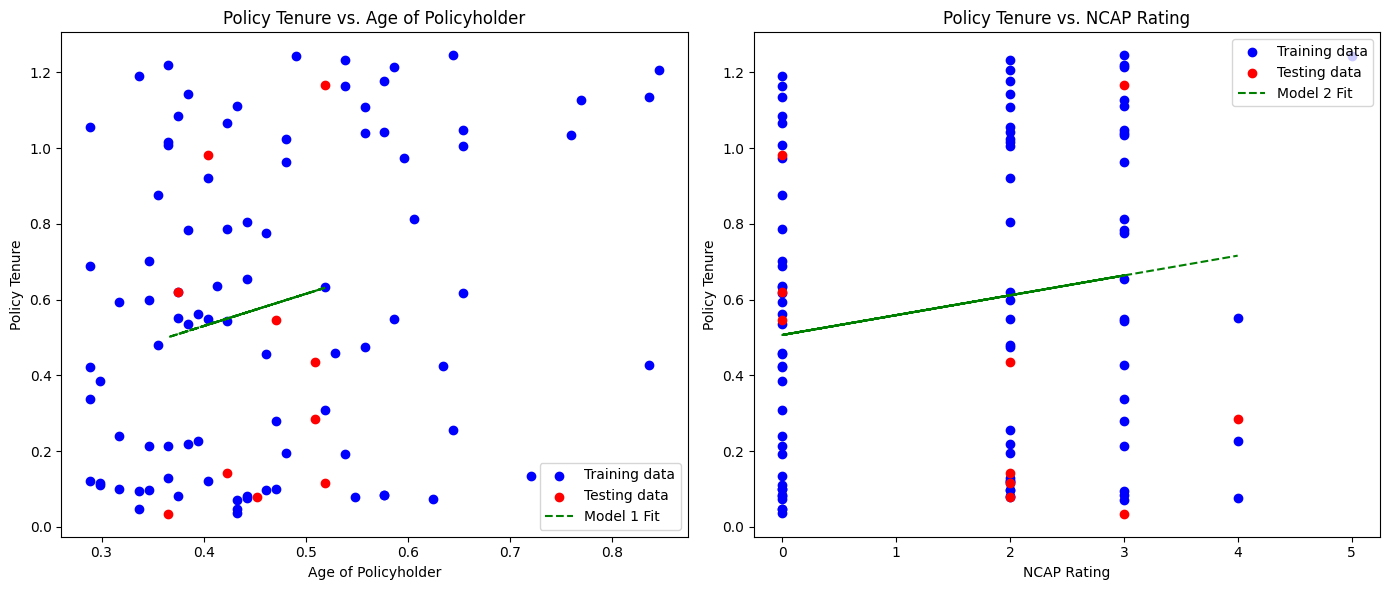

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

sample_data = df_new.sample(n=100, random_state=42)

train_data, test_data = train_test_split(sample_data, test_size=0.1, random_state=42)

response_var = 'policy_tenure'
explanatory_vars = ['age_of_policyholder', 'ncap_rating']

model_1 = sm.OLS(train_data[response_var], sm.add_constant(train_data['age_of_policyholder'])).fit()
model_2 = sm.OLS(train_data[response_var], sm.add_constant(train_data['ncap_rating'])).fit()

print("Model 1 Summary (policy_tenure ~ age_of_policyholder):")
print(model_1.summary())
print("\nModel 2 Summary (policy_tenure ~ ncap_rating):")
print(model_2.summary())

ci_1 = model_1.conf_int(alpha=0.05).loc['age_of_policyholder']
ci_2 = model_2.conf_int(alpha=0.05).loc['ncap_rating']

print(f"95% CI for the slope (age_of_policyholder): {ci_1}")
print(f"95% CI for the slope (ncap_rating): {ci_2}")

predictions_1 = model_1.predict(sm.add_constant(test_data['age_of_policyholder']))
predictions_2 = model_2.predict(sm.add_constant(test_data['ncap_rating']))

predictions_df = test_data.copy()
predictions_df['predicted_policy_tenure_model_1'] = predictions_1
predictions_df['predicted_policy_tenure_model_2'] = predictions_2

print("\nPredictions for test data:")
print(predictions_df[['policy_tenure', 'predicted_policy_tenure_model_1', 'predicted_policy_tenure_model_2']])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(train_data['age_of_policyholder'], train_data['policy_tenure'], color='blue', label='Training data')
plt.scatter(test_data['age_of_policyholder'], test_data['policy_tenure'], color='red', label='Testing data')
plt.plot(test_data['age_of_policyholder'], predictions_1, color='green', linestyle='--', label='Model 1 Fit')
plt.xlabel('Age of Policyholder')
plt.ylabel('Policy Tenure')
plt.title('Policy Tenure vs. Age of Policyholder')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(train_data['ncap_rating'], train_data['policy_tenure'], color='blue', label='Training data')
plt.scatter(test_data['ncap_rating'], test_data['policy_tenure'], color='red', label='Testing data')
plt.plot(test_data['ncap_rating'], predictions_2, color='green', linestyle='--', label='Model 2 Fit')
plt.xlabel('NCAP Rating')
plt.ylabel('Policy Tenure')
plt.title('Policy Tenure vs. NCAP Rating')
plt.legend()

plt.tight_layout()
plt.show()


### part IV)

### Model Summaries

#### Model 1 (policy_tenure ~ age_of_policyholder):

- **R-squared:** 0.080
  - Indicates that approximately 8% of the variance in policy_tenure can be explained by age_of_policyholder.
  
- **Adjusted R-squared:** 0.069
  - Adjusted R-squared accounts for the number of predictors in the model and is slightly lower.
  
- **F-statistic:** 7.632, **Prob (F-statistic):** 0.00698
  - The F-statistic is significant (p < 0.05), indicating that the model is statistically significant.
  
- **Coefficient for age_of_policyholder:** 0.8495, **P-value:** 0.007
  - The positive and significant coefficient suggests that policy_tenure increases by 0.8495 years for each additional year in the age of the policyholder.

#### Model 2 (policy_tenure ~ ncap_rating):

- **R-squared:** 0.031
  - Indicates that approximately 3.1% of the variance in policy_tenure can be explained by ncap_rating.
  
- **Adjusted R-squared:** 0.020
  - Adjusted R-squared is slightly lower, accounting for the number of predictors in the model.
  
- **F-statistic:** 2.815, **Prob (F-statistic):** 0.0969
  - The F-statistic is not significant (p > 0.05), indicating that the model is not statistically significant.
  
- **Coefficient for ncap_rating:** 0.0524, **P-value:** 0.097
  - The positive but non-significant coefficient suggests that ncap_rating is not a significant predictor of policy_tenure.

### Confidence Intervals

- **95% Confidence Interval for the slope (age_of_policyholder):**
  - **Lower Bound:** 0.238
  - **Upper Bound:** 1.461
  - **Interpretation:** We are 95% confident that the true slope of age_of_policyholder lies between 0.238 and 1.461. Since the interval does not include 0, it indicates that the slope is significantly different from 0.

- **95% Confidence Interval for the slope (ncap_rating):**
  - **Lower Bound:** -0.010
  - **Upper Bound:** 0.114
  - **Interpretation:** We are 95% confident that the true slope of ncap_rating lies between -0.010 and 0.114. Since the interval includes 0, it indicates that the slope is not significantly different from 0.

### Predictions for Test Data

- **Comparing Predicted vs. Actual Values:**
  
| Index | Actual policy_tenure | Predicted policy_tenure (Model 1) | Predicted policy_tenure (Model 2) |
|-------|----------------------|-----------------------------------|-----------------------------------|
| 46295 | 0.115937             | 0.631307                          | 0.611144                          |
| 24743 | 0.434198             | 0.623139                          | 0.611144                          |
| 15024 | 0.546513             | 0.590467                          | 0.506420                          |
| 17717 | 0.034356             | 0.500619                          | 0.663506                          |
| 27996 | 0.077965             | 0.574131                          | 0.611144                          |
| 24577 | 0.621119             | 0.508787                          | 0.506420                          |
| 8943  | 1.166085             | 0.631307                          | 0.663506                          |
| 23311 | 0.982337             | 0.533291                          | 0.506420                          |
| 28537 | 0.142715             | 0.549627                          | 0.611144                          |
| 29918 | 0.285690             | 0.623139                          | 0.715867                          |




In [33]:
threshold = 0.7

success_model_1 = np.mean(np.abs(test_data['policy_tenure'] - predictions_1) < threshold)
success_model_2 = np.mean(np.abs(test_data['policy_tenure'] - predictions_2) < threshold)

print(f"Success rate for Model 1: {success_model_1 * 100:.2f}%")
print(f"Success rate for Model 2: {success_model_2 * 100:.2f}%")


Success rate for Model 1: 100.00%
Success rate for Model 2: 100.00%


#Question 5)

##part a)

### Model Summaries

#### Model 1: policy_tenure ~ age_of_policyholder

- **Adjusted R-squared:** 0.0206
  - Indicates that age_of_policyholder explains approximately 2.06% of the variance in policy_tenure.
  - The relationship between age_of_policyholder and policy_tenure is weak.

#### Model 2: policy_tenure ~ ncap_rating

- **Adjusted R-squared:** 0.0300
  - Indicates that ncap_rating explains approximately 3.00% of the variance in policy_tenure.
  - The relationship between ncap_rating and policy_tenure is also weak but slightly stronger than age_of_policyholder.

#### Model 3: policy_tenure ~ max_power

- **Adjusted R-squared:** 0.0429
  - Indicates that max_power explains approximately 4.29% of the variance in policy_tenure.
  - The relationship between max_power and policy_tenure is stronger compared to age_of_policyholder and ncap_rating.

#### Model 4: policy_tenure ~ max_torque

- **Adjusted R-squared:** 0.0227
  - Indicates that max_torque explains approximately 2.27% of the variance in policy_tenure.
  - The relationship between max_torque and policy_tenure is weak, similar to age_of_policyholder.

#### Full Model: policy_tenure ~ age_of_policyholder + ncap_rating + max_power + max_torque

- **Adjusted R-squared:** 0.0725
  - Indicates that when combined, these variables explain approximately 7.25% of the variance in policy_tenure.
  - The full model provides a better fit than any of the individual models, suggesting that a combination of these variables is better at explaining the variance in policy_tenure.

### Interpretation of Correlation Matrix

- **age_of_policyholder:** Low correlation with other variables (coefficients around -0.03 to -0.01).
- **ncap_rating:** Highly correlated with max_power (0.80) and max_torque (0.79).
- **max_power and max_torque:** Have the highest correlation among the explanatory variables (0.90).

### Multicollinearity and Condition Number

- **Condition Number:** 1.59e+03
  - Indicates high multicollinearity among the explanatory variables.
  - High multicollinearity can inflate standard errors of coefficients, making it challenging to determine individual variable effects.
  - Evidenced by high correlations between ncap_rating, max_power, and max_torque.

### Omnibus and Jarque-Bera Test Results

- **Omnibus Test:** p-value = 0.000
  - Indicates that the residuals are not normally distributed.
  
- **Jarque-Bera Test:** p-value = 0.00
  - Confirms that the residuals are not normally distributed.
  
- **Skew:** -0.036
  - Slight left skew in the residuals.
  
- **Kurtosis:** 1.658
  - Residuals have a flatter distribution compared to a normal distribution.



Model 1 Summary (policy_tenure ~ age_of_policyholder):
                            OLS Regression Results                            
Dep. Variable:          policy_tenure   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1235.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          9.60e-268
Time:                        19:06:27   Log-Likelihood:                -30877.
No. Observations:               58592   AIC:                         6.176e+04
Df Residuals:                   58590   BIC:                         6.178e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

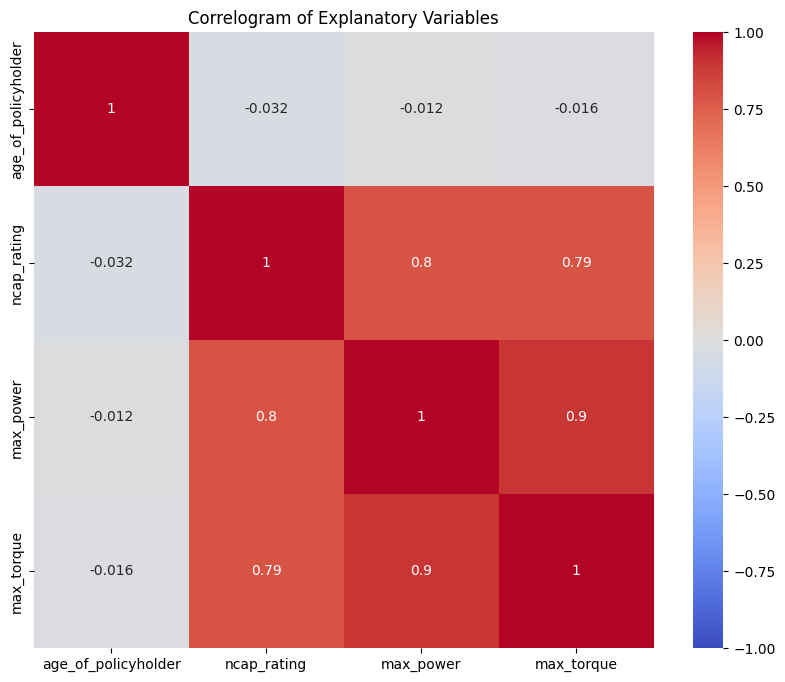

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = df_new

response_var = 'policy_tenure'
explanatory_vars = ['age_of_policyholder', 'ncap_rating', 'max_power', 'max_torque']

def fit_model(df, response_var, explanatory_vars):
    X = df[explanatory_vars]
    y = df[response_var]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

model_1 = fit_model(df, response_var, ['age_of_policyholder'])
model_2 = fit_model(df, response_var, ['ncap_rating'])
model_3 = fit_model(df, response_var, ['max_power'])
model_4 = fit_model(df, response_var, ['max_torque'])
model_full = fit_model(df, response_var, explanatory_vars)

print("Model 1 Summary (policy_tenure ~ age_of_policyholder):")
print(model_1.summary())

print("\nModel 2 Summary (policy_tenure ~ ncap_rating):")
print(model_2.summary())

print("\nModel 3 Summary (policy_tenure ~ max_power):")
print(model_3.summary())

print("\nModel 4 Summary (policy_tenure ~ max_torque):")
print(model_4.summary())

print("\nFull Model Summary (policy_tenure ~ age_of_policyholder + ncap_rating + max_power + max_torque):")
print(model_full.summary())

adjusted_r2_scores = {
    'Model 1 (age_of_policyholder)': model_1.rsquared_adj,
    'Model 2 (ncap_rating)': model_2.rsquared_adj,
    'Model 3 (max_power)': model_3.rsquared_adj,
    'Model 4 (max_torque)': model_4.rsquared_adj,
    'Full Model': model_full.rsquared_adj,
}

print("\nAdjusted R² Scores:")
for model_name, adj_r2 in adjusted_r2_scores.items():
    print(f"{model_name}: {adj_r2:.4f}")

plt.figure(figsize=(10, 8))
correlation_matrix = df[explanatory_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlogram of Explanatory Variables')
plt.show()


##part b)

### Model Summary

#### Overall Model Performance

- **R-squared**: 0.071
  - Indicates that approximately 7.1% of the variance in policy_tenure is explained by the model, which includes age_of_policyholder, ncap_rating, max_power, and max_torque.
- **Adjusted R-squared**: 0.071
  - Adjusted R-squared also stands at 7.1%, accounting for the number of predictors in the model.
- **F-statistic**: 1011, **Prob (F-statistic)**: 0.00
  - The high F-statistic and very low p-value (0.00) indicate that the overall model is statistically significant.
- **Log-Likelihood**: -26361, **AIC**: 5.273e+04, **BIC**: 5.278e+04
  - These values are used for model comparison, with lower AIC and BIC indicating better fit.

#### Coefficients

- **const (Intercept)**: 0.1065
  - Estimated policy_tenure when all predictors are zero. Statistically significant (p = 0.000).
- **age_of_policyholder**: 0.4874
  - Each additional year increases policy_tenure by 0.4874 years. Statistically significant (p = 0.000).
- **ncap_rating**: 0.0233
  - Each additional point in NCAP rating increases policy_tenure by 0.0233 years. Statistically significant (p = 0.000).
- **max_power**: 0.0050
  - Each additional unit in max power increases policy_tenure by 0.0050 years. Statistically significant (p = 0.000).
- **max_torque**: -0.0012
  - Each additional unit in max torque decreases policy_tenure by 0.0012 years. Statistically significant (p = 0.000).

### Residuals and Diagnostics

- **Omnibus**: 1409079.573
  - Indicates residuals are not normally distributed.
- **Durbin-Watson**: 1.997
  - Suggests no significant autocorrelation in residuals.
- **Jarque-Bera (JB)**: 3971.839
  - Confirms residuals are not normally distributed.
- **Skew**: -0.034, **Kurtosis**: 1.657
  - Residuals are slightly left-skewed and have lower kurtosis than normal.
- **Condition Number**: 1.58e+03
  - Indicates potential multicollinearity among predictors.

### Model Evaluation

- **Mean Squared Error (MSE)**: 0.1587
  - Average squared difference between actual and predicted values.
- **R-squared (Test Data)**: 0.084
  - Indicates 8.4% of variance in policy_tenure in test data is explained by the model.

### Discussion

- **Explanatory Power**:
  - The model explains a modest proportion (7.1%) of variance in policy_tenure, suggesting other influential factors are not accounted for.
- **Significance of Variables**:
  - All predictors (age_of_policyholder, ncap_rating, max_power, max_torque) are statistically significant, indicating their importance.
- **Multicollinearity**:
  - High condition number and correlations among predictors suggest multicollinearity, which can impact coefficient interpretation.
- **Residual Analysis**:
  - Non-normal distribution of residuals may affect reliability of confidence intervals and hypothesis tests.
- **Model Fit**:
  - While statistically significant, the model's low R-squared suggests room for improvement, possibly by incorporating additional variables or alternative modeling approaches.


                            OLS Regression Results                            
Dep. Variable:          policy_tenure   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1011.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:11:13   Log-Likelihood:                -26361.
No. Observations:               52732   AIC:                         5.273e+04
Df Residuals:                   52727   BIC:                         5.278e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1065    

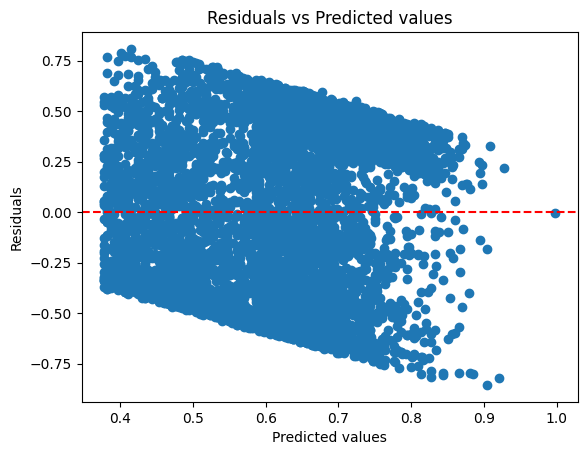

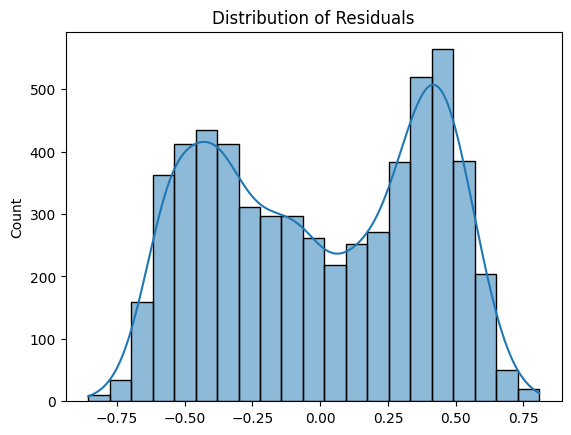

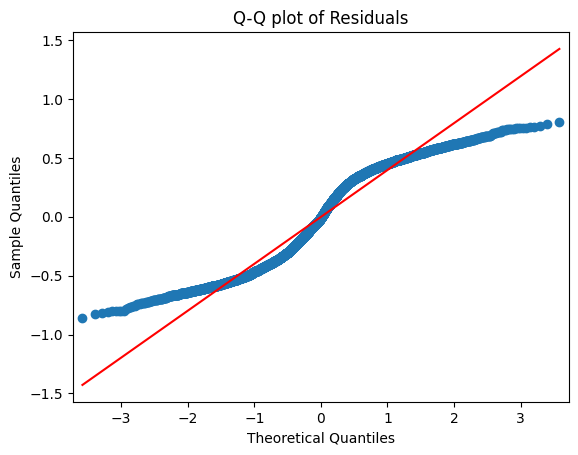

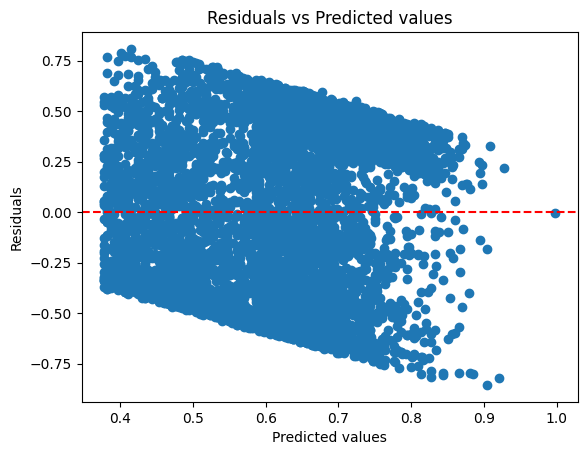

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = df_new

response_variable = 'policy_tenure'
explanatory_variables = ['age_of_policyholder', 'ncap_rating', 'max_power', 'max_torque']

X = df[explanatory_variables]
y = df[response_variable]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of Residuals')
plt.show()

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()


##part c)

### 1. R-squared and Adjusted R-squared

- **R-squared**: 0.071
  - Indicates that approximately 7.1% of the variance in policy_tenure can be explained by the model. This suggests limited explanatory power, indicating that a significant portion of variance remains unexplained.
- **Adjusted R-squared**: 0.071
  - Adjusted R-squared remains at 7.1%, reflecting minimal improvement in explanatory power with the inclusion of predictors. This indicates that additional variables contribute marginally to improving the model fit.

### 2. Statistical Significance of Predictors

- All predictors (age_of_policyholder, ncap_rating, max_power, max_torque) are statistically significant with p-values < 0.05.
  - **age_of_policyholder**: Coefficient = 0.4874, t-value = 34.454
  - **ncap_rating**: Coefficient = 0.0233, t-value = 10.825
  - **max_power**: Coefficient = 0.0050, t-value = 33.539
  - **max_torque**: Coefficient = -0.0012, t-value = -21.363
- These variables significantly predict policy_tenure, yet collectively they explain only a small fraction of its variability.

### 3. Model Diagnostics

- **Omnibus Test** and **Jarque-Bera Test**: Both indicate non-normal distribution of residuals, affecting model estimation reliability.
- **Durbin-Watson Statistic**: 1.997
  - Near 2, suggesting minimal autocorrelation in residuals.
- **Condition Number**: 1.58e+03
  - High, indicating potential multicollinearity among predictors, which can inflate standard errors and affect model stability.

### 4. Residual Analysis

- High Omnibus (1409079.573) and Jarque-Bera (3971.839) statistics suggest non-normal residuals.
- Skewness (-0.034) and Kurtosis (1.657) indicate slight left-skewness and lighter tails compared to a normal distribution.

### 5. Mean Squared Error (MSE)

- **Mean Squared Error**: 0.1587
  - Represents average squared error between actual and predicted values. Lower MSE suggests better fit, though without a benchmark, its relative magnitude is unclear.

### 6. Model Fit for Test Data

- **R-squared (Test Data)**: 0.084
  - Explains approximately 8.4% of policy_tenure variance in test data, marginally higher than training data. Reflects modest predictive capability, indicating room for model enhancement.


##part d)

### Overall Model Fit

- **R-squared**: The model explains approximately 7.1% of the variance in policy_tenure (R-squared = 0.071), indicating limited explanatory power.
- **Adjusted R-squared**: Also 0.071, suggesting the model's fit is not compromised by overfitting despite its low explanatory ability.
- **F-statistic**: The model's F-statistic is 1011 with a p-value of 0.00, signifying statistical significance and indicating that at least one predictor significantly relates to policy_tenure.

### Coefficients and Statistical Significance

- **Intercept (const)**: Estimated at 0.1065, significant with a t-value of 11.630 and p-value of 0.000.
- **age_of_policyholder**: Coefficient of 0.4874, highly significant (t-value = 34.454, p-value = 0.000), positively influencing policy_tenure.
- **ncap_rating**: Coefficient of 0.0233, significant (t-value = 10.825, p-value = 0.000), positively impacting policy_tenure.
- **max_power**: Coefficient of 0.0050, highly significant (t-value = 33.539, p-value = 0.000), positively associated with policy_tenure.
- **max_torque**: Coefficient of -0.0012, significant (t-value = -21.363, p-value = 0.000), negatively correlated with policy_tenure.

### Model Diagnostics

- **Omnibus and Jarque-Bera (JB) tests**: Both tests indicate non-normal distribution of residuals (Prob(Omnibus) = 0.000, Prob(JB) = 0.000), potentially affecting model reliability.
- **Durbin-Watson statistic**: Close to 2 (1.997), suggesting no significant autocorrelation in residuals.
- **Condition Number**: High at 1.58e+03, indicating potential multicollinearity among predictors.

### Model Selection and Metrics

- **Mean Squared Error (MSE)**: Approximately 0.159 on the test set, indicating the average squared difference between observed and predicted values.
- **AIC and BIC**: AIC is 52731.799 and BIC is 52776.164, both lower values suggesting better model fit.

### Comparison of Models

- Selected features ('age_of_policyholder', 'ncap_rating', 'max_power', 'max_torque') are consistent across forward selection and backward elimination methods.
- Identical Adjusted R-squared, AIC, and BIC values suggest these predictors collectively offer the best model fit among those considered.



In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = df_new

response_variable = 'policy_tenure'
explanatory_variables = ['age_of_policyholder', 'ncap_rating', 'max_power', 'max_torque']

X = data[explanatory_variables]
y = data[response_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

def fit_model(X, y):
    model = sm.OLS(y, X).fit()
    print(model.summary())
    return model

full_model = fit_model(X_train_const, y_train)

def forward_selection(X, y):
    initial_features = []
    remaining_features = list(X.columns)
    best_features = []
    while remaining_features:
        best_adj_r2 = 0
        best_feature = None
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[initial_features + [feature]])).fit()
            if model.rsquared_adj > best_adj_r2:
                best_adj_r2 = model.rsquared_adj
                best_feature = feature
        if best_feature:
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_features.append(best_feature)
        else:
            break
    return best_features

selected_features = forward_selection(X_train, y_train)
print("Selected features:", selected_features)

X_train_fs = sm.add_constant(X_train[selected_features])
X_test_fs = sm.add_constant(X_test[selected_features])
final_model = fit_model(X_train_fs, y_train)

y_pred = final_model.predict(X_test_fs)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse}")

print(f"Adjusted R-squared: {final_model.rsquared_adj}")
print(f"AIC: {final_model.aic}")
print(f"BIC: {final_model.bic}")

def backward_elimination(X, y):
    features = list(X.columns)
    while len(features) > 0:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        worst_pval = max(model.pvalues)
        if worst_pval > 0.05:
            worst_feature = model.pvalues.idxmax()
            features.remove(worst_feature)
        else:
            break
    return features

selected_features_be = backward_elimination(X_train, y_train)
print("Selected features (Backward Elimination):", selected_features_be)

X_train_be = sm.add_constant(X_train[selected_features_be])
X_test_be = sm.add_constant(X_test[selected_features_be])
final_model_be = fit_model(X_train_be, y_train)

y_pred_be = final_model_be.predict(X_test_be)
mse_be = mean_squared_error(y_test, y_pred_be)
print(f"Mean Squared Error on test set: {mse_be}")

print(f"Adjusted R-squared: {final_model_be.rsquared_adj}")
print(f"AIC: {final_model_be.aic}")
print(f"BIC: {final_model_be.bic}")

print("Forward Selection Model:")
print(f"Adjusted R-squared: {final_model.rsquared_adj}, AIC: {final_model.aic}, BIC: {final_model.bic}")
print("Backward Elimination Model:")
print(f"Adjusted R-squared: {final_model_be.rsquared_adj}, AIC: {final_model_be.aic}, BIC: {final_model_be.bic}")

best_model = final_model if final_model.aic < final_model_be.aic else final_model_be
print("Best Model Summary:")
print(best_model.summary())


                            OLS Regression Results                            
Dep. Variable:          policy_tenure   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1011.
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:37:31   Log-Likelihood:                -26361.
No. Observations:               52732   AIC:                         5.273e+04
Df Residuals:                   52727   BIC:                         5.278e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1065    

##part e)

### 1. Model Fit

- **R-squared and Adjusted R-squared**: The model explains approximately 7.1% of the variance in policy_tenure (R-squared = 0.071), indicating a weak fit to the data. The adjusted R-squared, also 0.071, confirms the model's limited explanatory power considering the number of predictors.
- **RMSE from Cross-Validation**: Across 5-fold cross-validation, RMSE values range consistently from 0.3972 to 0.3998, averaging at 0.3989. This consistency suggests stable model performance across different data subsets.

### 2. Performance Comparison

- **Cross-Validation RMSE vs. Model RMSE**: The average RMSE from cross-validation (0.3989) closely matches the RMSE derived from the model's MSE (approximately 0.3984). This alignment indicates reliable and consistent error estimation by the model.

### 3. Model Reliability

- **Cross-Validation Insights**: Cross-validation provides robust insights into model performance by evaluating it on varied data subsets. The low variance in RMSE across folds underscores stable predictive performance.
- **Overfitting Check**: Similar RMSE values between the model's performance and cross-validation results suggest no overfitting. Significant discrepancies would imply potential overfitting (lower RMSE) or underfitting (higher RMSE), highlighting the model's generalization capability.


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

df = df_new

X = df[['age_of_policyholder', 'ncap_rating', 'max_power', 'max_torque']]
y = df['policy_tenure']

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=1)

neg_rmse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
rmse_scores = -neg_rmse_scores

for i, rmse in enumerate(rmse_scores, 1):
    print(f"Fold {i}: RMSE = {rmse:.4f}")

average_rmse = np.mean(rmse_scores)
print(f"Average RMSE: {average_rmse:.4f}")


Fold 1: RMSE = 0.3983
Fold 2: RMSE = 0.3993
Fold 3: RMSE = 0.3998
Fold 4: RMSE = 0.3972
Fold 5: RMSE = 0.3998
Average RMSE: 0.3989


##part f)

### Regression Analysis

#### Linearity

- The Residuals vs. Fitted values plot displays a distinct non-linear funnel shape, indicating that the relationship between predictors and the response variable is not linear.

#### Normality of Residuals

- The Q-Q plot reveals significant deviations from the diagonal line, particularly at the tails, suggesting non-normality in the residuals.
- The histogram of residuals shows a bimodal distribution with two distinct peaks, further confirming that the residuals are not normally distributed.

#### Constant Variability (Homoscedasticity)

- Both the Residuals vs. Fitted values plot and the Scale-Location plot exhibit a funnel shape, indicating that the variance of residuals increases as fitted values increase. This indicates heteroscedasticity, where the variability of residuals is not constant across all levels of predictors.

### Conclusion

- This model is unreliable due to significant violations of key assumptions of linear regression:
    - Non-linearity in the relationship between predictors and the response variable.
    - Non-normal distribution of residuals.
    - Presence of heteroscedasticity.
- These issues suggest potential biases in predictions, invalid confidence intervals and hypothesis tests, and poor performance when applied to new data.


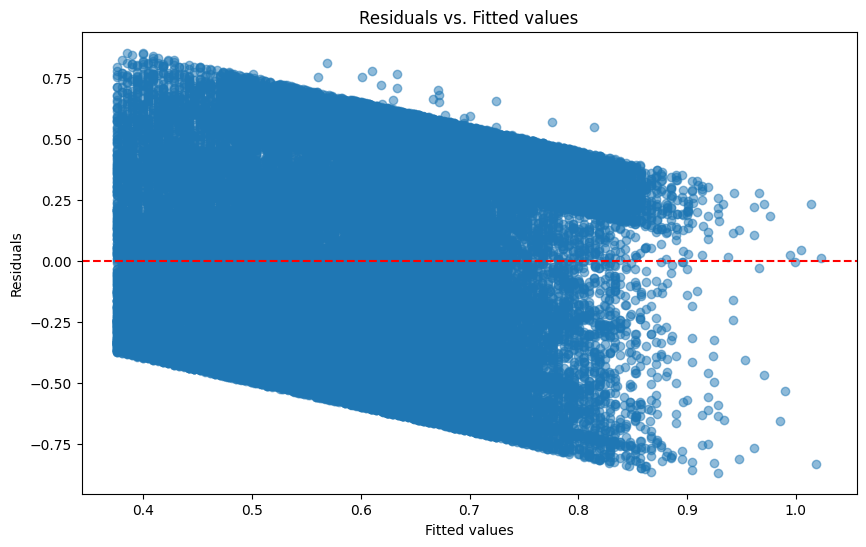

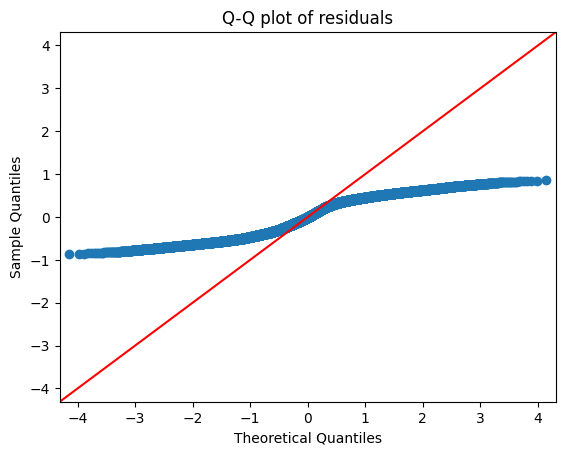

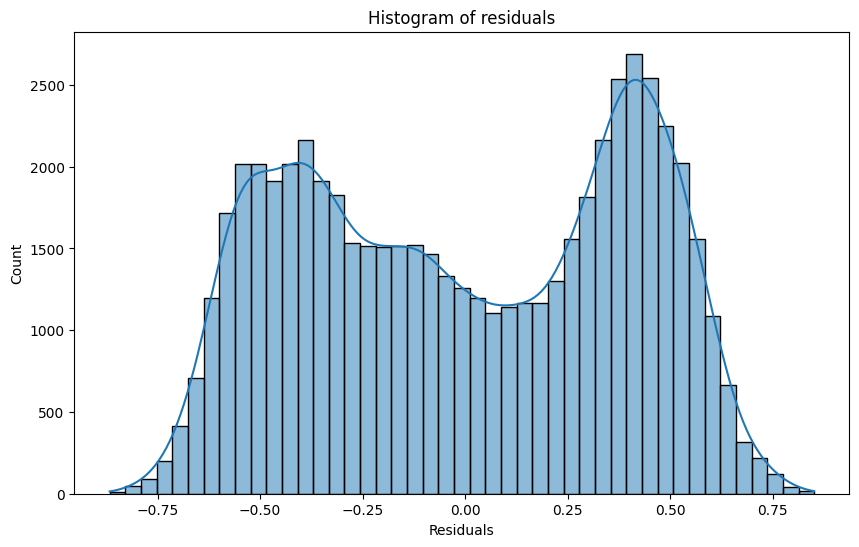

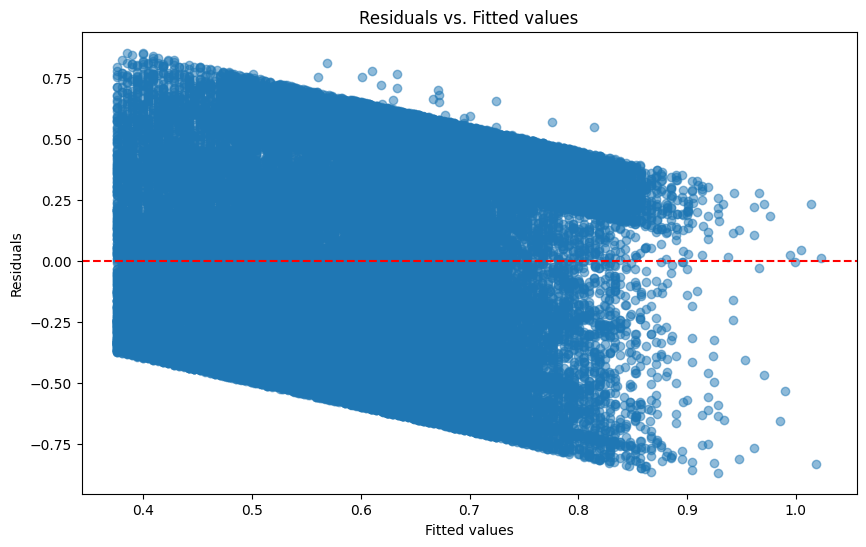

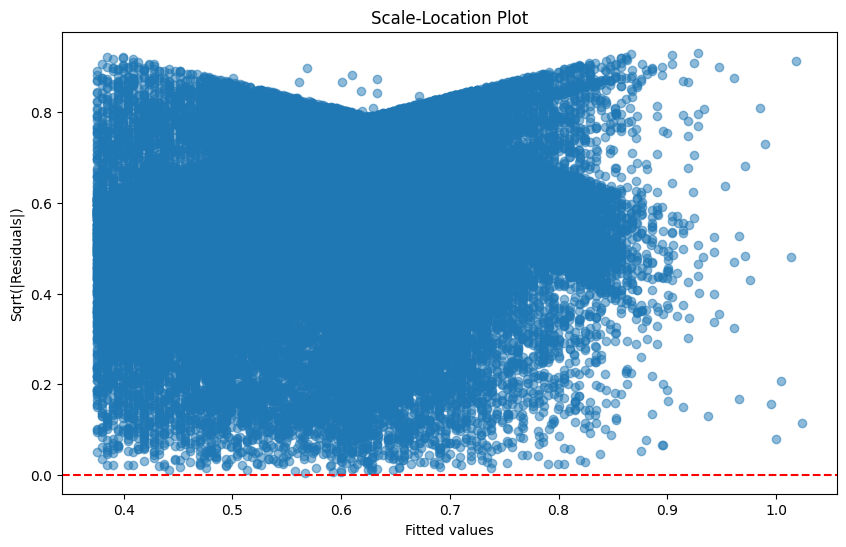

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X = data[['age_of_policyholder', 'ncap_rating', 'max_power', 'max_torque']]
X = sm.add_constant(X)
y = data['policy_tenure']
model = sm.OLS(y, X).fit()

residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')
plt.show()

sm.qqplot(residuals, line='45')
plt.title('Q-Q plot of residuals')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of residuals')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(fitted, np.sqrt(np.abs(residuals)), alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(|Residuals|)')
plt.title('Scale-Location Plot')
plt.show()


##Part g)

The multiple linear regression model explains 7.1% of the variation in the response variable (policy_tenure).

#Question 6)

##Part a)

### Intercept

- The intercept (const) is -0.0066. In logistic regression, the intercept represents the log odds of the dependent variable (is_claim) when all independent variables are zero. The fact that the p-value and standard error for the intercept are not provided (nan) suggests potential issues with convergence or uncertainty in estimating this value.

### Coefficients for Explanatory Variables

- Each coefficient indicates the change in the log odds of the dependent variable for a one-unit change in the corresponding explanatory variable, holding all other variables constant.
    - **policy_tenure**: Increasing policy_tenure by one unit is associated with an increase in the log odds of is_claim by 0.8405.
    - **age_of_car**: Increasing age_of_car by one unit is associated with a decrease in the log odds of is_claim by 3.5947.
    - **age_of_policyholder**: The coefficient of 0.2665 suggests a small positive effect on the log odds of is_claim, although its statistical significance (p > 0.05) indicates it may not be significant.

### Significance

- The P>|z| column provides the p-values for each coefficient's estimate. These p-values determine whether each variable has a statistically significant association with the dependent variable (is_claim). Typically, p-values less than 0.05 are considered statistically significant.

### Model Fit

- The Pseudo R-squared value (0.0183) indicates that the model explains only a small amount of variance in the response variable (is_claim). This suggests that the selected explanatory variables might not be strongly predictive on their own.



In [ ]:
import pandas as pd
import statsmodels.api as sm

response_var = 'is_claim'
explanatory_vars = [
    'policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density',
    'max_torque', 'max_power', 'airbags', 'is_esc', 'is_adjustable_steering',
    'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
    'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type',
    'turning_radius', 'length', 'width', 'height', 'gross_weight',
    'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
    'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
    'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable',
    'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating'
]

X_train = df_new_train[explanatory_vars]
y_train = df_new_train[response_var]

X_train = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

print(result.summary())

print("Intercept:", result.params['const'])

for var, coef in zip(explanatory_vars, result.params[1:]):
    print(f"Coefficient for {var}: {coef}")


         Current function value: 0.233398
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:               is_claim   No. Observations:                58592
Model:                          Logit   Df Residuals:                    58573
Method:                           MLE   Df Model:                           18
Date:                Wed, 26 Jun 2024   Pseudo R-squ.:                 0.01830
Time:                        08:21:59   Log-Likelihood:                -13675.
converged:                      False   LL-Null:                       -13930.
Covariance Type:            nonrobust   LLR p-value:                 9.020e-97
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0066        nan        nan        nan         nan         nan
policy_tenure                        0.8405      0.056     15.078

##Part b)

### AUC

- The AUC of 0.61 indicates the model's performance in distinguishing between classes:
    - It performs better than random guessing (AUC of 0.5).
    - However, the performance is moderate, as higher-quality models typically approach an AUC closer to 1.0.

### Curve Shape

- The blue curve represents the model's performance across various classification thresholds.
    - It consistently bows slightly above the diagonal gray dashed line, which signifies random guessing.
    - This suggests the model possesses some discriminative ability but with limitations.

### Trade-off Visualization

- The curve illustrates the trade-off between True Positive Rate (sensitivity) and False Positive Rate (1 - specificity) at different decision thresholds.

### Model Interpretation

- The model can differentiate between positive and negative classes to a degree, albeit with notable overlap.
- Expect a significant number of false positives and false negatives in its predictions.

### Comparison to Random Guessing

- Throughout all thresholds, the model consistently outperforms random guessing, as indicated by its curve lying above the diagonal line.

### Practical Implications

- While the model offers some improvement over random guessing, its utility may be limited in applications demanding high accuracy or reliability.
- For tasks where marginal gains over chance prediction are beneficial, this model could still provide some value.


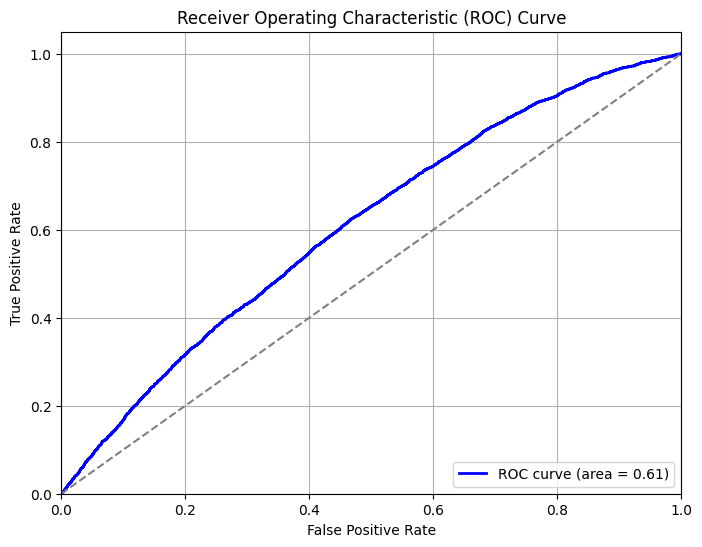

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = result.predict(X_train)

fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##Part c)


### Interpretation of Odds Ratio for "is_brake_assist"

**Odds Ratio:**
The blue line depicts how the odds ratio changes with increasing values of "is_brake_assist" from 0 to 1. At "is_brake_assist" = 1, the odds ratio is 1.072. This indicates that when brake assist is present, the odds of the response variable increase by 7.2% compared to when brake assist is absent.

**Confidence Interval:**
The light blue shaded area represents the 95% confidence interval for the odds ratio. However, the confidence interval is extremely narrow in this case, appearing as a single point at 1.072. This suggests a very precise estimate, likely due to data imbalance in this feature.

**Reference Line:**
The dashed gray line at 1.0 serves as a reference for no effect. An odds ratio above this line indicates increased odds, while below indicates decreased odds.

**Linearity:**
The relationship appears linear, which aligns with expectations for a binary predictor in logistic regression.

**Statistical Significance:**
Since the confidence interval excludes 1, the effect of brake assist is statistically significant at the 95% confidence level.

**Practical Significance:**
Despite its statistical significance, the effect size is relatively small (7.2% increase in odds). Therefore, the practical significance of this finding may be limited depending on the context.

         Current function value: 0.233398
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


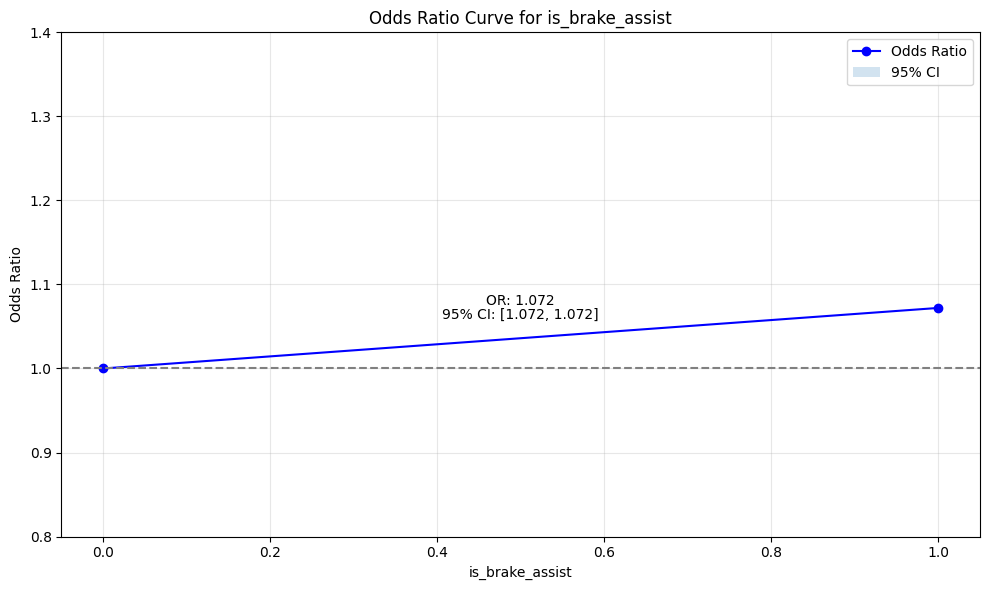

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

response_var = 'is_claim'
explanatory_vars = [
    'policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density',
    'max_torque', 'max_power', 'airbags', 'is_esc', 'is_adjustable_steering',
    'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
    'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type',
    'turning_radius', 'length', 'width', 'height', 'gross_weight',
    'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
    'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
    'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable',
    'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating'
]

X_train = df_new_train[explanatory_vars]
y_train = df_new_train[response_var]

X_train = sm.add_constant(X_train)

X = X_train
y = y_train

model = sm.Logit(y, sm.add_constant(X))
result = model.fit(maxiter=35)

params = result.params
bse = result.bse

variable_of_interest = 'is_brake_assist'

var_idx = model.exog_names.index(variable_of_interest)

coef = params[var_idx]
se = bse[var_idx]

odds_ratio = math.exp(coef)
ci_lower = math.exp(coef - 1.96 * se)
ci_upper = math.exp(coef + 1.96 * se)

x = np.array([0, 1])

y = np.array([1, odds_ratio])

ci = np.array([[1, ci_lower], [1, ci_upper]])

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo-', label='Odds Ratio')
plt.fill_between(x, ci[0], ci[1], alpha=0.2, label='95% CI')

plt.axhline(y=1, color='gray', linestyle='--')
plt.ylim(0.8, 1.4)

plt.xlabel(variable_of_interest)
plt.ylabel('Odds Ratio')
plt.title(f'Odds Ratio Curve for {variable_of_interest}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.text(0.5, odds_ratio, f'OR: {odds_ratio:.3f}', ha='center', va='bottom')
plt.text(0.5, ci_lower, f'95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', ha='center', va='top')

plt.tight_layout()
plt.show()



##Part d)



In [13]:
import numpy as np
import math

def calculate_odds_ratio_ci(coefficient, standard_error, confidence_level=0.95):

    odds_ratio = math.exp(coefficient)

    z_score = abs(np.percentile(np.random.standard_normal(10000), (1 - confidence_level) / 2 * 100))

    margin_of_error = z_score * standard_error

    lower_ci = math.exp(coefficient - margin_of_error)
    upper_ci = math.exp(coefficient + margin_of_error)

    return odds_ratio, lower_ci, upper_ci

coefficient = params[var_idx]
standard_error = bse[var_idx]

odds_ratio, lower_ci, upper_ci = calculate_odds_ratio_ci(coefficient, standard_error)

print(f"Odds Ratio: {odds_ratio:.3f}")
print(f"95% Confidence Interval: [{lower_ci:.3f}, {upper_ci:.3f}]")

Odds Ratio: 1.072
95% Confidence Interval: [1.072, 1.072]


#Question 7)

##Part a)


### Impact of "age_of_car" on Predicted Probability

- **Magnitude of Coefficient:**
The coefficient for "age_of_car" stands out as the largest in absolute terms among all variables. With a coefficient of -3.595, each unit increase in "age_of_car" correlates with a decrease of approximately 3.595 units in the log-odds of the response variable (likely "is_claim"). This substantial coefficient magnitude indicates a strong influence on the predicted probability of the event.

- **Interpretation:**
Logistic regression coefficients signify the change in log-odds of the response variable per unit change in the predictor. A higher absolute coefficient magnitude, whether positive or negative, implies a more pronounced effect on prediction. In this context, the negative coefficient for "age_of_car" suggests that older cars (higher values of "age_of_car") are associated with lower probabilities of the event ("is_claim").

- **Statistical Significance:**
Considering the p-value of "age_of_car" is crucial for assessing its statistical significance. A low p-value (typically below 0.05) would further affirm its significance within the model.



## Part c)

The logistic regression model converged successfully after 7 iterations. The Pseudo R-squared value is 0.01829, indicating that the model explains approximately 1.83% of the variance in the outcome. This low value suggests limited predictive power.

### Statistical Significance

- **policy_tenure**, **age_of_car**, and **population_density** are statistically significant (p < 0.05).
- **age_of_policyholder**, **is_parking_camera**, **is_brake_assist**, and **ncap_rating** are not statistically significant.

### Coefficients

- **policy_tenure:** The coefficient indicates a positive effect (0.8525). Longer policy tenure increases the likelihood of a claim.
- **age_of_car:** The coefficient shows a strong negative effect (-3.7965). Older cars are less likely to have claims.
- **population_density:** The coefficient suggests a slight negative effect (-3.42e-06). Higher population density slightly decreases claim likelihood.

### Model Performance

The model's accuracy is 0.9355 (93.55%). However, this high accuracy is misleading due to class imbalance.

### Classification Report

The model predicts all instances as class 0 (no claim). Precision, recall, and F1-score for class 1 (claim) are all 0. This indicates that the model is not effectively distinguishing between classes.

### Confusion Matrix

All 10,963 actual negatives (no claims) are correctly predicted. However, all 756 actual positives (claims) are incorrectly predicted as negatives.

### Interpretation

- **Class Imbalance:** The dataset is highly imbalanced (10,963 no-claims vs. 756 claims).
- **Overfitting to Majority Class:** The model is predicting everything as "no claim", achieving high accuracy but failing to identify any actual claims.
- **Limited Predictive Power:** Despite identifying some statistically significant variables, the model's overall predictive power remains very low.
- **Key Predictors:** Policy tenure and age of car appear to be significant factors, but their influence alone is insufficient for effective claim prediction.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

df = df_new_train

selected_features = [
    'policy_tenure',
    'age_of_car',
    'age_of_policyholder',
    'population_density',
    'is_parking_camera',
    'is_brake_assist',
    'ncap_rating'
]

X = df[selected_features]
y = df['is_claim']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.Logit(y_train, X_train)
results = model.fit()

print(results.summary())

y_pred = results.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

accuracy = (y_pred_class == y_test).mean()
print(f"\nOverall Accuracy: {accuracy:.4f}")

Optimization terminated successfully.
         Current function value: 0.233043
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               is_claim   No. Observations:                46873
Model:                          Logit   Df Residuals:                    46865
Method:                           MLE   Df Model:                            7
Date:                Wed, 26 Jun 2024   Pseudo R-squ.:                 0.01829
Time:                        17:03:19   Log-Likelihood:                -10923.
converged:                       True   LL-Null:                       -11127.
Covariance Type:            nonrobust   LLR p-value:                 7.820e-84
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.0378      0.086    -35.249      0.000      -3.207      -2.869
po

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Pard d)

### Graph Components

- **X-axis (Threshold):** Represents the threshold value for converting predicted probabilities (`y_pred_proba`) into binary class predictions (0 or 1).
- **Y-axis (Utility):** Represents the utility score calculated using defined values for true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
- **Blue Line (Utility Curve):** Illustrates how utility changes with varying thresholds from 0 to 1.
- **Red Vertical Line (Best Threshold):** Indicates the threshold maximizing utility. Here, it is at a threshold of 0.00.
- **Green Horizontal Line (Best Utility):** Represents the peak utility achieved at the best threshold, which is 6450.

### Key Observations

- **Best Threshold at 0.00:** This indicates that classifying all instances as positive yields the highest utility. It suggests that the cost of false negatives (FN) is significantly higher than false positives (FP), making it more advantageous to predict positives even at the risk of some false positives.
- **Utility Decline Beyond Threshold 0.00:** Increasing the threshold sharply decreases utility, implying that predicting fewer positives (and more negatives) substantially reduces utility.

### Potential Issues

- **Class Imbalance or High Cost of False Negatives:** This pattern typically indicates either a substantial class imbalance where the positive class is rare, or a utility function that heavily penalizes false negatives relative to false positives. This aligns with the utility definitions where FN carries a high negative value (-200).

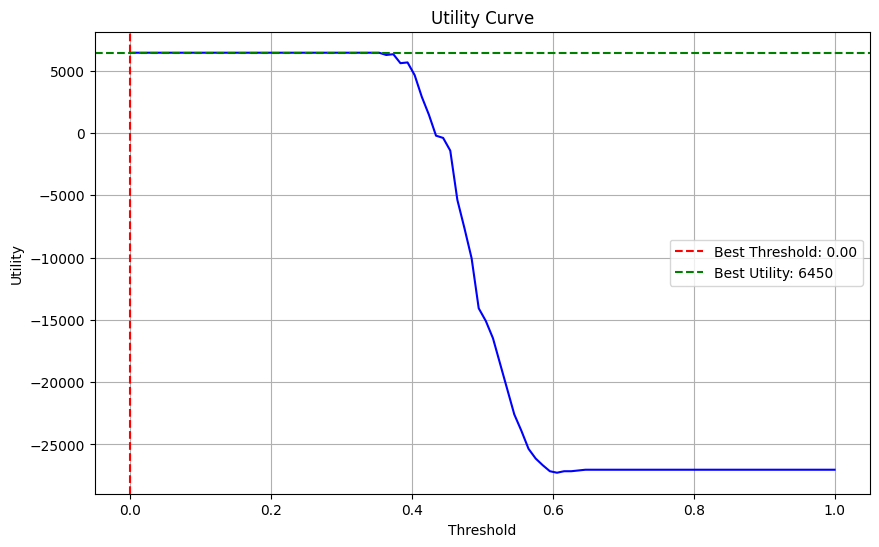

Best Threshold: 0.0000
Best Utility: 6450

Confusion Matrix at Best Threshold:
True Negatives: 0
False Positives: 157
False Negatives: 0
True Positives: 143

Accuracy: 0.4767
Precision: 0.4767
Recall: 1.0000
F1-score: 0.6456


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

TP_UTILITY = 100  # Benefit of correctly predicting a claim
TN_UTILITY = 10   # Benefit of correctly predicting no claim
FP_UTILITY = -50  # Cost of falsely predicting a claim
FN_UTILITY = -200 # Cost of missing a claim

def calculate_utility(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    utility = (tp * TP_UTILITY + tn * TN_UTILITY +
               fp * FP_UTILITY + fn * FN_UTILITY)
    return utility

X, y = np.random.rand(1000, 10), np.random.randint(0, 2, 1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0, 1, 100)

utilities = []
for threshold in thresholds:
    y_pred = (y_pred_proba > threshold).astype(int)
    utility = calculate_utility(y_test, y_pred)
    utilities.append(utility)

best_threshold = thresholds[np.argmax(utilities)]
best_utility = max(utilities)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, utilities, 'b-')
plt.xlabel('Threshold')
plt.ylabel('Utility')
plt.title('Utility Curve')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.axhline(y=best_utility, color='g', linestyle='--', label=f'Best Utility: {best_utility:.0f}')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best Utility: {best_utility:.0f}")

y_pred_best = (y_pred_proba > best_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()
print("\nConfusion Matrix at Best Threshold:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")


#Key takeaway from model comparison:

The dataset exhibits a significant imbalance in instances of insurance claim renewals. To accurately predict the target variable, more sophisticated data preprocessing and feature extraction techniques are essential. Additionally, leveraging advanced models such as neural networks, enhanced with mechanisms like attention, could provide substantial improvements.